# Day of the Week
Does the price action data on Mondays for Bitcoin set the bias (bullish/bearish) for the rest of the week?

In [1]:
import pandas as pd
import sqlite3
# import seaborn as sns 
import matplotlib.pyplot as plt
from datetime import datetime

ModuleNotFoundError: No module named 'seaborn'

In [2]:
# Create connection
conn = sqlite3.connect('../db/crypto-analysis.db')
c = conn.cursor()

In [3]:
df_btc = pd.read_sql(
    '''
    SELECT date, symbol, open, close
    FROM coinbase
    WHERE symbol = 'BTC'
    ORDER BY date DESC
    ''', conn
)

In [4]:
# Get day of the week given the date

day_names = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df_btc['day_of_week'] = df_btc['date'].apply(lambda x: day_names[datetime.strptime(x,'%Y-%m-%d').weekday()])
df_btc.head(10)

,date,symbol,open,close,day_of_week
0,2021-08-31,BTC,46996.80,47557.79,Tuesday
1,2021-08-30,BTC,48802.58,46993.71,Monday
2,2021-08-29,BTC,48942.89,48802.58,Sunday
3,2021-08-28,BTC,49081.08,48942.94,Saturday
4,2021-08-27,BTC,46851.47,49077.57,Friday
5,2021-08-26,BTC,48991.57,46851.47,Thursday
6,2021-08-25,BTC,47682.45,48987.33,Wednesday
7,2021-08-24,BTC,49504.53,47682.45,Tuesday
8,2021-08-23,BTC,49284.38,49506.50,Monday
9,2021-08-22,BTC,48870.21,49284.63,Sunday


In [5]:
df_btc['pct_chng'] = round(((df_btc['open'] - df_btc['close'])/df_btc['close']) * 100,2)
df_btc.head(10)

,date,symbol,open,close,day_of_week,pct_chng
0,2021-08-31,BTC,46996.80,47557.79,Tuesday,-1.18
1,2021-08-30,BTC,48802.58,46993.71,Monday,3.85
2,2021-08-29,BTC,48942.89,48802.58,Sunday,0.29
3,2021-08-28,BTC,49081.08,48942.94,Saturday,0.28
4,2021-08-27,BTC,46851.47,49077.57,Friday,-4.54
5,2021-08-26,BTC,48991.57,46851.47,Thursday,4.57
6,2021-08-25,BTC,47682.45,48987.33,Wednesday,-2.66
7,2021-08-24,BTC,49504.53,47682.45,Tuesday,3.82
8,2021-08-23,BTC,49284.38,49506.50,Monday,-0.45
9,2021-08-22,BTC,48870.21,49284.63,Sunday,-0.84


,date,symbol,open,close,day_of_week,pct_chng
536,2020-03-12,BTC,7938.05,4857.10,Thursday,63.43
2049,2016-01-15,BTC,430.04,357.53,Friday,20.28
1443,2017-09-14,BTC,3855.61,3250.40,Thursday,18.62
1299,2018-02-05,BTC,8167.90,6905.19,Monday,18.29
1013,2018-11-19,BTC,5560.00,4733.50,Monday,17.46
...,...,...,...,...,...,...
880,2019-04-02,BTC,4137.01,4901.93,Tuesday,-15.60
204,2021-02-08,BTC,38871.43,46448.10,Monday,-16.31
1360,2017-12-06,BTC,11718.34,14090.00,Wednesday,-16.83
1359,2017-12-07,BTC,14090.00,17390.01,Thursday,-18.98


Check for outliers that could skew the data

In [13]:
df_btc.sort_values('pct_chng', ascending=False)

,date,symbol,open,close,day_of_week,pct_chng
536,2020-03-12,BTC,7938.05,4857.10,Thursday,63.43
2049,2016-01-15,BTC,430.04,357.53,Friday,20.28
1443,2017-09-14,BTC,3855.61,3250.40,Thursday,18.62
1299,2018-02-05,BTC,8167.90,6905.19,Monday,18.29
1013,2018-11-19,BTC,5560.00,4733.50,Monday,17.46
...,...,...,...,...,...,...
880,2019-04-02,BTC,4137.01,4901.93,Tuesday,-15.60
204,2021-02-08,BTC,38871.43,46448.10,Monday,-16.31
1360,2017-12-06,BTC,11718.34,14090.00,Wednesday,-16.83
1359,2017-12-07,BTC,14090.00,17390.01,Thursday,-18.98


In [14]:
df_btc_clean = df_btc[abs(df_btc['pct_chng']) <=25]
df_btc_clean.sort_values('pct_chng', ascending=False)

,date,symbol,open,close,day_of_week,pct_chng
2049,2016-01-15,BTC,430.04,357.53,Friday,20.28
1443,2017-09-14,BTC,3855.61,3250.40,Thursday,18.62
1299,2018-02-05,BTC,8167.90,6905.19,Monday,18.29
1013,2018-11-19,BTC,5560.00,4733.50,Monday,17.46
1319,2018-01-16,BTC,13590.00,11570.01,Tuesday,17.46
...,...,...,...,...,...,...
880,2019-04-02,BTC,4137.01,4901.93,Tuesday,-15.60
204,2021-02-08,BTC,38871.43,46448.10,Monday,-16.31
1360,2017-12-06,BTC,11718.34,14090.00,Wednesday,-16.83
1359,2017-12-07,BTC,14090.00,17390.01,Thursday,-18.98


In [21]:
# sns.set_theme(style="ticks", palette="pastel")

# sns.boxplot(x="day_of_week", y='pct_chng', data=df_btc)

NameError: name 'sns' is not defined

{'whiskers': [<matplotlib.lines.Line2D at 0x12fce7400>,
 'caps': [<matplotlib.lines.Line2D at 0x12fe071c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12fce7280>,
 'medians': [<matplotlib.lines.Line2D at 0x12fe07880>,
 'fliers': [<matplotlib.lines.Line2D at 0x12fe07c10>,
 'means': []}

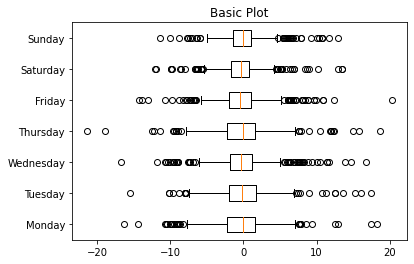

In [15]:
fig1, ax1 = plt.subplots()
ax1.set_title('Basic Plot')

plots = [
    df_btc_clean[df_btc_clean['day_of_week'] == 'Monday']['pct_chng'],
    df_btc_clean[df_btc_clean['day_of_week'] == 'Tuesday']['pct_chng'],
    df_btc_clean[df_btc_clean['day_of_week'] == 'Wednesday']['pct_chng'],
    df_btc_clean[df_btc_clean['day_of_week'] == 'Thursday']['pct_chng'],
    df_btc_clean[df_btc_clean['day_of_week'] == 'Friday']['pct_chng'],
    df_btc_clean[df_btc_clean['day_of_week'] == 'Saturday']['pct_chng'],
    df_btc_clean[df_btc_clean['day_of_week'] == 'Sunday']['pct_chng']
]
ax1.boxplot(plots, vert=False, labels=day_names)